In [2]:
rm(list=ls())
library(foreign)
library(TSA)
library(zoo)
library(eventstudies)
library(tseries)
library(urca)
library(changepoint)
library(MASS)

Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


read the data (only **U.K.**)

In [3]:
ukc <- read.dta("/Users/tpliu/Do-Scandals-Matter-An-Interrupted-Time-Series-Design-on-Three-Cases/Data/DAYPOLLS_UKC.dta")
ukl <- read.dta("/Users/tpliu/Do-Scandals-Matter-An-Interrupted-Time-Series-Design-on-Three-Cases/Data/DAYPOLLS_UKL.dta")

create the date (based on stata)

In [4]:
ukc$date <- seq(as.Date("1935-11-15"),as.Date("2010-05-06"), by="day")
ukl$date <- seq(as.Date("1935-11-15"),as.Date("2010-05-06"), by="day")
uk <- cbind(ukc$ipoll_, ukl$ipoll_, ukl$poll_)
colnames(uk) <- c("Con","Lab", "poll")
uk <- zoo(uk, ukc$date)

subset the data

In [5]:
ukoa <- uk[time(uk) >= "2000-01-01",]

plot the **Labour Party**

searching for the index of the date when scandal happend

In [6]:
which(time(ukoa)=="2008-01-08")

[1] 2930

create values for vline, one for each panel

In [7]:
vlines <- c(v=time(ukoa)[2930], v=time(ukoa)[2930])

panel function that loops over panels

In [9]:
v.panel <- function(x, ...){
	lines(x, ...)
	panel.number <- parent.frame()$panel.number
	abline(v = vlines[panel.number], col = "red", lty=2)
}

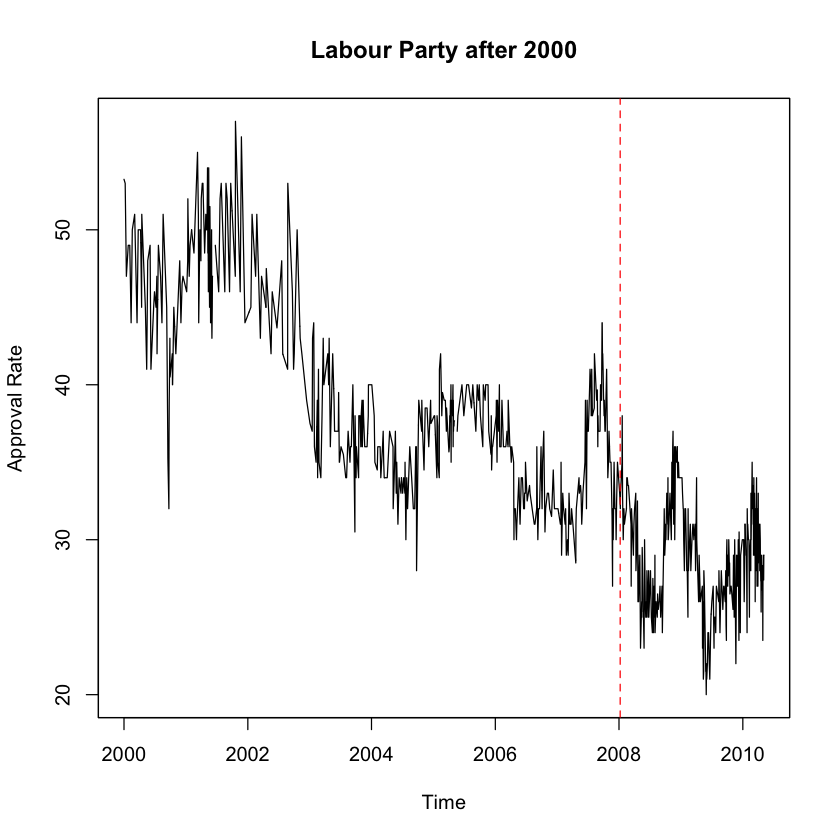

In [10]:
plot(ukoa$Lab, panel=v.panel, main="Labour Party after 2000", xlab="Time", ylab="Approval Rate")
abline(v=time(ukoa)[2930], lty=2, col="red")

Go to **UK(Labour)2M1**